Alguns detalhes importantes
**Subúrbio** : Subúrbio

**Endereço** : Endereço

**Quartos** : Número de quartos

**Preço** : Preço em dólares australianos

**Método :**

S - imóvel vendido;

SP - imóvel vendido anteriormente;

PI - imóvel repassado;

VB - oferta de fornecedor;

SA - vendido após leilão;

**Tipo :**

h - casa, chalé, vila, semi, terraço;

u - unidade, duplex;

t - casa geminada;


**VendedorG** : Agente Imobiliário

**Data** : Data de venda

**Distância** : Distância do CBD em quilômetros

Nome da região: Região geral (Oeste, Noroeste, Norte, Nordeste...etc)

Propertycount : Número de propriedades que existem no subúrbio.

Banheiro : Número de Banheiros

Carro : Número de vagas

Tamanho do terreno : Tamanho do terreno em metros

CouncilArea : Conselho de administração para a área


# **Importando os dados:**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split



# desabilita os warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("MELBOURNE_HOUSE_PRICES_LESS.csv")

In [3]:
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63018,Roxburgh Park,3 Carr Pl,3,h,566000.0,S,Raine,31/03/2018,3064,Northern Metropolitan,5833,20.6,Hume City Council
63019,Roxburgh Park,9 Parker Ct,3,h,500000.0,S,Raine,31/03/2018,3064,Northern Metropolitan,5833,20.6,Hume City Council
63020,Roxburgh Park,5 Parkinson Wy,3,h,545000.0,S,Raine,31/03/2018,3064,Northern Metropolitan,5833,20.6,Hume City Council
63021,Thomastown,3/1 Travers St,3,u,NaN,PI,Barry,31/03/2018,3074,Northern Metropolitan,7955,15.3,Whittlesea City Council


**Verificando se há dados nulos:**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63023 entries, 0 to 63022
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         63023 non-null  object 
 1   Address        63023 non-null  object 
 2   Rooms          63023 non-null  int64  
 3   Type           63023 non-null  object 
 4   Price          48433 non-null  float64
 5   Method         63023 non-null  object 
 6   SellerG        63023 non-null  object 
 7   Date           63023 non-null  object 
 8   Postcode       63023 non-null  int64  
 9   Regionname     63023 non-null  object 
 10  Propertycount  63023 non-null  int64  
 11  Distance       63023 non-null  float64
 12  CouncilArea    63023 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 6.3+ MB


In [5]:
df.isna().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price            14590
Method               0
SellerG              0
Date                 0
Postcode             0
Regionname           0
Propertycount        0
Distance             0
CouncilArea          0
dtype: int64

**A coluna "Price" é o Target, como há alguns valores nulos vamos retira-los pois o algoritmo não irá aprender se não há referência.**

In [6]:
df.dropna(inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48433 entries, 0 to 63020
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         48433 non-null  object 
 1   Address        48433 non-null  object 
 2   Rooms          48433 non-null  int64  
 3   Type           48433 non-null  object 
 4   Price          48433 non-null  float64
 5   Method         48433 non-null  object 
 6   SellerG        48433 non-null  object 
 7   Date           48433 non-null  object 
 8   Postcode       48433 non-null  int64  
 9   Regionname     48433 non-null  object 
 10  Propertycount  48433 non-null  int64  
 11  Distance       48433 non-null  float64
 12  CouncilArea    48433 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 5.2+ MB


**Vimos que na coluna "Address" há o número de cada imóvel, vamos retirar pois os valores não são impactantes para o resultado de predição.**

In [8]:
lista = []
for c in df["Address"]:
   lista.append(c.split(" ", 1)[1])
df["Address"] = lista

In [9]:
df["Address"]

0           Lithgow St
1            Turner St
2             Yarra St
3              Vida St
4        Clydesdale Rd
             ...      
63016        Petrie St
63017        Murray Rd
63018          Carr Pl
63019        Parker Ct
63020     Parkinson Wy
Name: Address, Length: 48433, dtype: object

In [10]:
df.describe()

,Rooms,Price,Postcode,Propertycount,Distance
count,48433.000000,4.843300e+04,48433.000000,48433.000000,48433.000000
mean,3.071666,9.978982e+05,3123.210332,7566.399913,12.702761
std,0.944708,5.934989e+05,125.534940,4457.405884,7.550030
min,1.000000,8.500000e+04,3000.000000,39.000000,0.000000
25%,2.000000,6.200000e+05,3051.000000,4280.000000,7.000000
50%,3.000000,8.300000e+05,3103.000000,6567.000000,11.700000
75%,4.000000,1.220000e+06,3163.000000,10412.000000,16.700000
max,31.000000,1.120000e+07,3980.000000,21650.000000,55.800000


# **XGBOOST**

## **Black Box**

In [11]:
#Separando o que é features e target:
X = df.drop(columns="Price")
y = df["Price"]

# Dividindo em dados de teste e dados de treino, peguei 20% para dados de teste:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Iniciando a construção da Pipeline:
# ==========================================================
#Primeiro vamos tratar as features numéricas. Tratando os valores nulos (NaN) e escalonando já que a variância entre as features é grande.
pipe_features_num = Pipeline([("input_num", SimpleImputer(strategy="mean")),
                              ("std", StandardScaler())])

features_num = X_train.select_dtypes(include=np.number).columns.tolist()
# ==========================================================
# Tratando as features categóricas. Os valores nulos (NaN) serão preenchidos pelos dados mais constantes e posteriormente codificaremos todas elas com o One Hot Encoder e Ordinal Enconder. Percebemos que o One Hot Encoder 
# é para features categóricas binárias e o Ordinal Enconder para features categóricas ordinais (não binários)

pipe_features_oe = Pipeline([("input_cat_oe", SimpleImputer(strategy="constant", fill_value="unknown")),
                             ("ordinal", OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))])

features_oe = ["Suburb", "Address", "Type", "Method", "SellerG", "Date", "CouncilArea", "Regionname"]

# ==========================================================
# Pré-processador => Pegando as pipelines anteriores e unindo-as.
pre_processador = ColumnTransformer([("transf_num", pipe_features_num, features_num),
                                     ("transf_cat", pipe_features_oe, features_oe)])

# ==========================================================
# Pipeline final, usando o pré-processador e o estimador que queremos utilizar, neste caso o XGBoost para regressão.
pipe_xgbr = Pipeline([("pre_processador", pre_processador),
                     ("xgbr", XGBRegressor(eval_metric='logloss', random_state=42))])

# ==========================================================
#Vamos dividir em splits para ter mais variedade no processamento dos dados.
splitter = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

#Montando a grade de parâmetros do estimador (XGBoost)
params_grid_xgbr = {"xgbr__n_estimators": [5000],
                   "xgbr__max_depth": [3],
                   "xgbr__learning_rate": [0.01],
                   "xgbr__colsample_bytree": [0.5],
                   "xgbr__subsample": [0.5]}


#Motando a grade geral de parâmetros.
grid_xgbr = GridSearchCV(estimator=pipe_xgbr,
                       param_grid=params_grid_xgbr,
                       scoring="r2",
                       cv=splitter,
                       verbose=10,
                       n_jobs=-1)

grid_xgbr.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[21:35:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('pre_processador',
                                        ColumnTransformer(transformers=[('transf_num',
                                                                         Pipeline(steps=[('input_num',
                                                                                          SimpleImputer()),
                                                                                         ('std',
                                                                                          StandardScaler())]),
                                                                         ['Rooms',
                                                                          'Postcode',
                                                                          'Propertycount',
                                                                          'Distance']),
           

In [12]:
grid_xgbr.best_params_

{'xgbr__colsample_bytree': 0.5,
 'xgbr__learning_rate': 0.01,
 'xgbr__max_depth': 3,
 'xgbr__n_estimators': 5000,
 'xgbr__subsample': 0.5}

In [13]:
xgbr_results = pd.DataFrame(grid_xgbr.cv_results_)
xgbr_results.sort_values(by=["rank_test_score"])

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_xgbr__colsample_bytree,param_xgbr__learning_rate,param_xgbr__max_depth,param_xgbr__n_estimators,param_xgbr__subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,115.839672,19.135122,2.15685,0.250625,0.5,0.01,3,5000,0.5,"{'xgbr__colsample_bytree': 0.5, 'xgbr__learnin...",0.716487,0.743208,0.72705,0.687525,0.714969,0.717848,0.018207,1


In [14]:
# Predições de treino
y_pred_train_xgbr = grid_xgbr.predict(X_train)

print("\nMétricas de treino:\n")
print(f"R^2: {r2_score(y_train, y_pred_train_xgbr):.2f}")
print(f"MAE: {mean_absolute_error(y_train, y_pred_train_xgbr):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train_xgbr)):.2f}")

# Predições de teste
y_pred_test_xgbr = grid_xgbr.predict(X_test)

print("\nMétricas de teste:\n")
print(f"R^2: {r2_score(y_test, y_pred_test_xgbr):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_test_xgbr):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test_xgbr)):.2f}") 


Métricas de treino:

R^2: 0.76
MAE: 175601.22
RMSE: 290896.04

Métricas de teste:

R^2: 0.72
MAE: 192911.63
RMSE: 309916.26


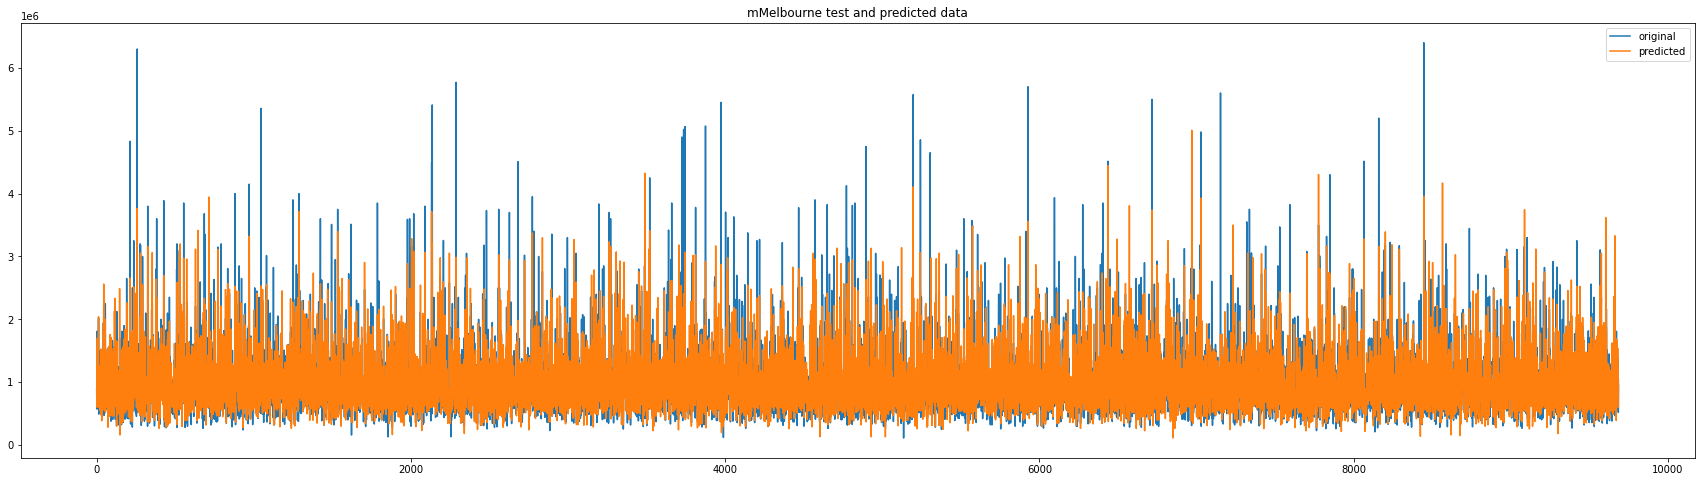

In [15]:
plt.figure(figsize=(30,8))
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred_test_xgbr, label="predicted")
plt.title("mMelbourne test and predicted data")
plt.legend()
plt.show();

In [16]:
import pickle

In [17]:
with open("grid_xgbr.pkl", "wb") as f:
    pickle.dump(grid_xgbr, f)

In [18]:
with open("grid_xgbr.pkl", "rb") as f:
    
    grid_xgbr = pickle.load(f)

[21:36:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [19]:
y_pred_test_xgbr

array([ 976776.94,  918176.9 ,  602512.4 , ...,  897571.56,  601055.44,
       1038958.9 ], dtype=float32)

In [20]:
y_test.values

array([885000., 640000., 572000., ..., 901000., 522000., 955000.])

**Vamos criar uma tabela com a porcentagem de acertos para cada dado**

In [21]:
tabela_xgbr = pd.DataFrame()

In [22]:
tabela_xgbr["valores reais"] = y_test

In [23]:
tabela_xgbr["valores preditos"] = y_pred_test_xgbr

In [24]:
tabela_xgbr["porcentagem de acerto %"]= (y_test/y_pred_test_xgbr)*100

In [25]:
lista_num = []
for c in tabela_xgbr["porcentagem de acerto %"]:
  if c > 100:
    num = abs(c - 200)
    lista_num.append(num)
  else:
    num = c
    lista_num.append(num)
  

tabela_xgbr["porcentagem de acerto %"]= lista_num

In [26]:
tabela_xgbr

,valores reais,valores preditos,porcentagem de acerto %
37778,885000.0,9.767769e+05,90.604105
43001,640000.0,9.181769e+05,69.703346
38183,572000.0,6.025124e+05,94.935809
1578,1810000.0,1.390415e+06,69.823050
8416,1630000.0,1.699573e+06,95.906421
...,...,...,...
23803,981000.0,8.653992e+05,86.641917
6051,1050000.0,9.761660e+05,92.436327
44110,901000.0,8.975716e+05,99.618032
35171,522000.0,6.010554e+05,86.847230


# **Intervalo de confiança do XGBoost - Vamos simular intervalos para amostras com 29 e 90 dados:**

In [35]:
df = pd.read_csv("MELBOURNE_HOUSE_PRICES_LESS.csv")

In [36]:
df.dropna(inplace=True)

**Vimos que na coluna "Address" há o número de cada imóvel, vamos retirar pois os valores não são impactantes para o resultado de predição.**

In [38]:
lista = []
for c in df["Address"]:
   lista.append(c.split(" ", 1)[1])
df["Address"] = lista

In [40]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, KFold
from scipy.stats import norm
from scipy import stats
from scipy.stats import t

In [45]:
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,0.0,7735.0,3,0.0,1490000.0,1.0,180.0,0.0,3067,2.0,4019,3.0,32.0
1,0.0,12829.0,3,0.0,1220000.0,1.0,225.0,0.0,3067,2.0,4019,3.0,32.0
2,0.0,13930.0,3,0.0,1420000.0,1.0,253.0,0.0,3067,2.0,4019,3.0,32.0
3,1.0,13039.0,3,0.0,1515000.0,1.0,28.0,0.0,3040,6.0,1543,7.5,22.0
4,2.0,2776.0,2,0.0,670000.0,1.0,253.0,0.0,3042,6.0,3464,10.4,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63016,147.0,10212.0,2,2.0,347700.0,3.0,14.0,88.0,3199,4.0,17055,38.0,7.0
63017,275.0,9254.0,3,0.0,808000.0,1.0,305.0,88.0,3072,2.0,14577,8.4,6.0
63018,288.0,2283.0,3,0.0,566000.0,1.0,306.0,88.0,3064,2.0,5833,20.6,11.0
63019,288.0,9991.0,3,0.0,500000.0,1.0,306.0,88.0,3064,2.0,5833,20.6,11.0


**Transformando as Features categóricas em numéricas - OrdinalEncoder() - Feature com mais de 2 dados diferentes.**

In [44]:
# "Suburb", "Address", "Type" "Method", "SellerG", "Regionname", "CouncilArea", "Date"
oe =  OrdinalEncoder()
oe.fit(df[["Suburb", "Address", "Type", "Method", "SellerG", "Regionname", "CouncilArea", "Date"]])

df[["Suburb", "Address", "Type", "Method", "SellerG", "Regionname", "CouncilArea", "Date"]] = oe.transform(df[["Suburb", "Address", "Type", "Method", "SellerG", "Regionname", "CouncilArea", "Date"]])

**Vamos escalonar todas as Features, pois a amplitude entre os dados está muito grande, isso pode causar um viés no resultado final:**

In [46]:
ssc = StandardScaler()

ssc.fit(df[['Suburb', 'Address', 'Rooms', 'Type', 'Method', 'SellerG', "Date", 'Postcode', 'Regionname', 'Propertycount', 'Distance', 'CouncilArea' ]])
h= ssc.transform(df[['Suburb', 'Address', 'Rooms', 'Type', 'Method', 'SellerG', "Date", 'Postcode', 'Regionname', 'Propertycount', 'Distance', 'CouncilArea']])
df[['Suburb', 'Address', 'Rooms', 'Type', 'Method', 'SellerG',"Date", 'Postcode', 'Regionname', 'Propertycount', 'Distance', 'CouncilArea']] = h

In [47]:
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,-1.743259,0.160389,-0.075861,-0.611260,1490000.0,-0.394141,-0.218651,-1.777147,-0.447771,-0.683565,-0.795852,-1.285142,1.773861
1,-1.743259,1.409837,-0.075861,-0.611260,1220000.0,-0.394141,0.152343,-1.777147,-0.447771,-0.683565,-0.795852,-1.285142,1.773861
2,-1.743259,1.679888,-0.075861,-0.611260,1420000.0,-0.394141,0.383185,-1.777147,-0.447771,-0.683565,-0.795852,-1.285142,1.773861
3,-1.733626,1.461345,-0.075861,-0.611260,1515000.0,-0.394141,-1.471789,-1.777147,-0.662853,1.202665,-1.351338,-0.689112,0.786622
4,-1.723993,-1.055945,-1.134401,-0.611260,670000.0,-0.394141,0.383185,-1.777147,-0.646921,1.202665,-0.920365,-0.305003,0.786622
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63016,-0.327250,0.767944,-1.134401,1.901485,347700.0,1.305947,-1.587210,1.028760,0.603740,0.259550,2.128749,3.350649,-0.694237
63017,0.905737,0.532967,-0.075861,-0.611260,808000.0,-0.394141,0.811890,1.028760,-0.407941,-0.683565,1.572814,-0.569906,-0.792961
63018,1.030962,-1.176868,-0.075861,-0.611260,566000.0,-0.394141,0.820134,1.028760,-0.471669,-0.683565,-0.388885,1.045999,-0.299341
63019,1.030962,0.713737,-0.075861,-0.611260,500000.0,-0.394141,0.820134,1.028760,-0.471669,-0.683565,-0.388885,1.045999,-0.299341


In [48]:
#Separando o que é features e target:
X = df.drop(columns="Price")
y = df["Price"]

In [49]:
X = np.array(X)

**Com 30 e 90 amostras**

In [55]:
resultados_xgbr_cv_30 = []
resultados_xgbr_cv_90 = []
for i in range(10):
  kfold = KFold(n_splits = 9, shuffle = True, random_state = i)
  
  xgbr = XGBRegressor(objective ='reg:squarederror')
  scores = cross_val_score(xgbr , X, y, cv = kfold)
  resultados_xgbr_cv_90.append(scores)
  resultados_xgbr_cv_30.append(scores.mean())

In [56]:
scores

array([0.69573918, 0.69854252, 0.72685067, 0.73114142, 0.71401819,
       0.67548813, 0.70703346, 0.68521908, 0.71898755])

In [57]:
resultados_xgbr_cv_30 = np.array(resultados_xgbr_cv_30)
resultados_xgbr_cv_90 = np.array(np.asarray(resultados_xgbr_cv_90).reshape(-1))

**Para 30 amostras usamos o t-student:**

In [59]:
intervalos_xgbr_t = t.interval(0.95, len(resultados_xgbr_cv_30) - 1, 
                                    resultados_xgbr_cv_30.mean(), 
                                    stats.sem(resultados_xgbr_cv_30, ddof = 0))
intervalos_xgbr_t

(0.7051951545145555, 0.7059941716402834)

**Variação do intervalo:**

In [60]:
abs(resultados_xgbr_cv_30.mean() - intervalos_xgbr_t[1])

0.0003995085628639705

In [61]:
print(f"Temos 95% de confiança de que a média de acertos do XGBoost com 30 amostras está no intervalo entre {intervalos_xgbr_t[0]*100:.2f} % e {intervalos_xgbr_t[1]*100:.2f} %")

Temos 95% de confiança de que a média de acertos do XGBoost com 30 amostras está no intervalo entre 70.52 % e 70.60 %


**Média do score:**

In [62]:
pd.DataFrame(resultados_xgbr_cv_30).mean()[0]

0.7055946630774195



---



**Para 90 amostras**

In [63]:
intervalos_xgbr_n = norm.interval(0.95, resultados_xgbr_cv_90.mean(), 
                                       stats.sem(resultados_xgbr_cv_90))
intervalos_xgbr_n

(0.7018419471296703, 0.7093473790251684)

**Para 90 amostras ele acabou aumentando a margem de erro em relação ao de 29 amostras, o que é esperado.**

**Variação do intervalo:**

In [64]:
abs(resultados_xgbr_cv_90.mean() - intervalos_xgbr_n[1])

0.0037527159477490635

In [65]:
print(f"Temos 95% de confiança de que a média de acertos do XGBoost com 90 amostras está no intervalo entre {intervalos_xgbr_n[0]*100:.2f}% e {intervalos_xgbr_n[1]*100:.2f}%")

Temos 95% de confiança de que a média de acertos do XGBoost com 90 amostras está no intervalo entre 70.18% e 70.93%


**Média do score:**

In [66]:
resultado_90 = resultados_xgbr_cv_90
resultado_90 = (resultado_90[0] + resultado_90[1] + resultado_90[2])/3
resultado_90

0.7122879283364901

#**INTERPRETANDO O MODELO GLOBALMENTE**

**Para a interpretação só podemos considerar as features numéricas, vamos retirar as features categóricas:**

**SHAP**

In [67]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,-1.743259,0.160389,-0.075861,-0.61126,1490000.0,-0.394141,-0.218651,-1.777147,-0.447771,-0.683565,-0.795852,-1.285142,1.773861
1,-1.743259,1.409837,-0.075861,-0.61126,1220000.0,-0.394141,0.152343,-1.777147,-0.447771,-0.683565,-0.795852,-1.285142,1.773861
2,-1.743259,1.679888,-0.075861,-0.61126,1420000.0,-0.394141,0.383185,-1.777147,-0.447771,-0.683565,-0.795852,-1.285142,1.773861
3,-1.733626,1.461345,-0.075861,-0.61126,1515000.0,-0.394141,-1.471789,-1.777147,-0.662853,1.202665,-1.351338,-0.689112,0.786622
4,-1.723993,-1.055945,-1.134401,-0.61126,670000.0,-0.394141,0.383185,-1.777147,-0.646921,1.202665,-0.920365,-0.305003,0.786622


In [68]:
X = df.drop(columns=["Price"])
y = df["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

In [ ]:
!pip install shap
import shap

In [71]:
xgbr = XGBRegressor(bjective ='reg:squarederror').fit(X_train, y_train)

[22:19:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [72]:
explainer = shap.TreeExplainer(xgbr)

In [73]:
shap_vals = explainer.shap_values(X_train)

**Temos abaixo as Features que mais impactaram na escolha dos valores preditivos para todos os dados:**

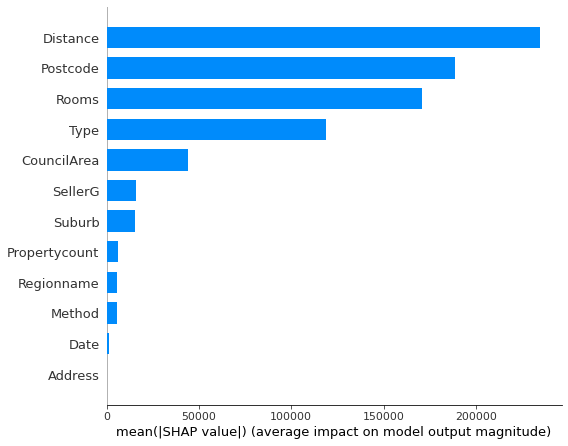

In [74]:
shap.summary_plot(shap_vals, X_train, plot_type="bar")